# Ball Tracking using Matrix Methods

Import statements, uses math, numpy, matplotlib and scipy packages.

In [25]:
import math 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.sparse import find
from scipy.linalg import lu, qr

Simulate ball motion using basic kinematic equations, creates an overshot estimate of the time the ball hits the ground, then goes back and corrects once the exact time of impact is calculated. The Cord function calculates the coordiantes of x and y over time according to the initial conditions.  The initial conditions can be freely set by the user.

# Initial Conditions

In [ ]:
ax = 0
ay = -10
vx0 = 4
vy0 = 70
x0 = 0
y0 = 0

# Creation of Simulation Data of a Ball's Projectile Motion

In [2]:
def Cord(v,a,t):
    return v*t+0.5*a*t**2

In [3]:
tmax = vy0**2 + vx0**2
t = np.arange(tmax)
x = Cord(vx0,ax,t)
y = Cord(vy0,ay,t)

tmax = math.ceil(2*math.sqrt(2*np.max(y)/abs(ay))) + 1

t = np.arange(tmax)
x = Cord(vx0,ax,t)
y = Cord(vy0,ay,t)

# Plot of Simulation Data

Below is a plot of x and y, showing the balls trajectory over space.

Text(0, 0.5, 'y')

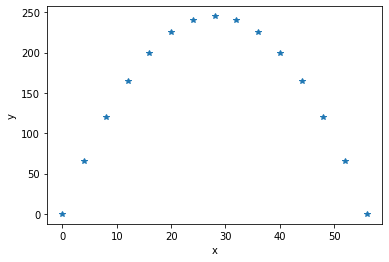

In [33]:
plt.plot(x,y, '*')
plt.xlabel('x')
plt.ylabel('y')

# Creation of Matrix of Ball SImulation Data to feed into Algorithm

Created a Matrix of the simiulation Ball Position.  This matrix is the only piece of information carried over from the original simulation.  The matrix must be square, thus we used the larger space dimention to make each frame square.  The matrix is 3D, the first 2 dimentions are x and y and the third, which need not be square, is time.

In [18]:
if (np.max(x) > np.max(y)):
    maxDim = math.ceil(np.max(x))+1
else:
    maxDim = math.ceil(np.max(y))+1
MATRIX = np.zeros((maxDim,maxDim,math.ceil(tmax)))

For every time frame, place a 1 in the matrix where the ball is located, and a zero elsewhere.

In [19]:
for i in range(tmax):
    MATRIX[int(x[i]),int(y[i]),i] = 1

# Below is the implementation of the algorithm.
A 1 dimentional matrix, named z, the same size as a side of the square frames is created, and has values in it listed from 0 to the max number of rows/columns (There are the same number of rows as there are columns as the matrix frames are square).  By takeing the dot products, we have $row=z\cdot M_i$ and $column=M_i\cdot z$, where $M_i$ is the square matrix at time i.

In [20]:
z = np.arange(maxDim)

In [21]:
row = np.zeros(tmax)
column = np.zeros(tmax)
for i in range(tmax):
    row[i] = sum(np.dot(z,MATRIX[:,:,i]))
    column[i] = np.sum(np.dot(MATRIX[:,:,i],z))

# Below is the plot of the results.

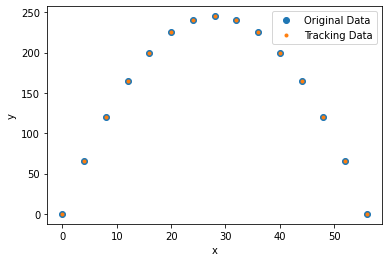

In [32]:
plt.plot(x,y, 'o', label = "Original Data")
plt.plot(row,column, '.', label = "Tracking Data")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

As can be seen, the original data and the tracking data are very similar indeed.